In [1]:
import torch
import torchvision

In [2]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.6.0+cpu
Torchvision version: 0.21.0+cpu
CUDA is available: False


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

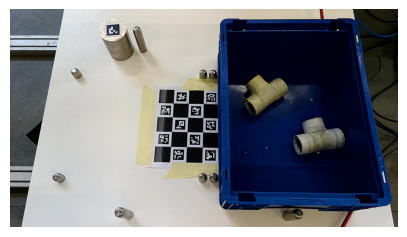

In [4]:
image = cv2.imread('img_box.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

In [5]:
def show_mask(mask, ax, random_color=False, borders=True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask = mask.astype(np.uint8)
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    if borders:
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
        mask_image = cv2.drawContours(mask_image, contours, -1, (1, 1, 1, 0.5), thickness=2)
    ax.imshow(mask_image)

def show_masks(image, masks, scores):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()

In [8]:
def generate_masks(image_path, model_checkpoint, model_config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    image = Image.open(image_path)
    image = np.array(image.convert("RGB"))
    
    sam2_model = build_sam2(model_config, model_checkpoint, device=device)
    predictor = SAM2ImagePredictor(sam2_model)
    predictor.set_image(image)
    
    input_point = np.array([[500, 375]])  # Adjust based on the image
    input_label = np.array([1])
    
    masks, scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    show_masks(image, masks, scores)

FileNotFoundError: [Errno 2] No such file or directory: 'sam_vit_h_4b8939.pth'